In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install patchify

In [ ]:
# !pip3 install tensorflow==2.10.0

In [ ]:
!pip install -U Segmentation_models

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 kB 2.7 MB/s eta 0:00:00


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
import os
import cv2
import numpy as np

In [ ]:
os.environ["SM_FRAMEWORK"] = "tf.keras"

In [ ]:
from matplotlib import pyplot as plt
from patchify import patchify
from PIL import Image
import segmentation_models as sm #to work with vgg backbone with some image net wieghts
from tensorflow.keras.metrics import MeanIoU


Segmentation Models: using `tf.keras` framework.


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
root_directry = '/content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/'

In [ ]:
patch_size = 256

In [ ]:
image_dataset= []
for path,subdirs,files in os.walk(root_directry):
    # print(path)
    dirname = path.split(os.path.sep)[-1]

    if dirname == 'images':
      images = sorted(os.listdir(path))
      # self.images = sorted(glob.glob(os.path.join(dirname,'images')))
      for i ,image_name in enumerate(images):
        if image_name.endswith(".jpg"):
          image = cv2.imread(path+"/"+image_name,1)
          scale_x = (image.shape[1]//patch_size)*patch_size
          scale_y = (image.shape[0]//patch_size)*patch_size
          image = Image.fromarray(image)
          image = image.crop((0,0,scale_x,scale_y))
          image = np.array(image)

          print("Now Patching image: ",path+"/"+image_name)
          patches_img = patchify(image, (patch_size,patch_size,3),step = patch_size)
          # print(patches_img)




Now Patching image:  /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg
Now Patching image:  /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/images/image_part_002.jpg
Now Patching image:  /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/images/image_part_003.jpg
Now Patching image:  /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/images/image_part_004.jpg
Now Patching image:  /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/images/image_part_005.jpg
Now Patching image:  /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/images/image_part_006.jpg
Now Patching image:  /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/images/image_part_007.jpg
Now Patching image:  /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/images/image_part_008.jpg


In [ ]:
patches_img.shape

(5, 8, 1, 256, 256, 3)

In [ ]:
for i in range(patches_img.shape[0]):
  for j in range(patches_img.shape[1]):
    single_patch_image = patches_img[i,j,:,:]
    single_patch_image = scaler.fit_transform(single_patch_image.reshape(-1, single_patch_image.shape[-1])).reshape(single_patch_image.shape)
    single_patch_image = single_patch_image[0]
    image_dataset.append(single_patch_image)

In [ ]:
single_patch_image.shape

(256, 256, 3)

In [ ]:
# image_dataset

In [ ]:
mask_dataset = []
for path,subdirs ,files in os.walk(root_directry):
   dirname = path.split(os.path.sep)[-1]
   if dirname == "masks":
       masks = sorted(os.listdir(path))
       for i,mask_name in enumerate(masks):
          if mask_name.endswith(".png"):
             mask = cv2.imread(path+"/"+mask_name,1)
             mask = cv2.cvtColor(mask,cv2.COLOR_BGR2RGB)
             scale_x = (mask.shape[1]//patch_size)*patch_size
             scale_y = (mask.shape[0]//patch_size)*patch_size
             mask = Image.fromarray(mask)
             mask = mask.crop((0 ,0, scale_x, scale_y))
             mask = np.array(mask)

             print("Now Patching mask:  ",path+"/"+mask_name)
             patches_mask = patchify(mask, (patch_size, patch_size, 3),step = patch_size)


Now Patching mask:   /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/masks/image_part_001.png
Now Patching mask:   /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/masks/image_part_002.png
Now Patching mask:   /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/masks/image_part_003.png
Now Patching mask:   /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/masks/image_part_004.png
Now Patching mask:   /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/masks/image_part_005.png
Now Patching mask:   /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/masks/image_part_006.png
Now Patching mask:   /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/masks/image_part_007.png
Now Patching mask:   /content/drive/My Drive/SatelliteImagery/Semantic segmentation dataset/Tile 1/masks/image_part_008.png
Now Patc

In [ ]:
patches_mask.shape

(5, 8, 1, 256, 256, 3)

In [ ]:
for i in range(patches_mask.shape[0]):
    for j in range(patches_mask.shape[1]):
        single_patch_mask = patches_mask[i,j,:,:]
        #single_patch_mask = scaler.fit_transform(single_patch_mask.reshape(-1, single_patch_mask.shape[-1])).reshape(single_patch_mask.shape)
        single_patch_mask = single_patch_mask[0]
        mask_dataset.append(single_patch_mask)




In [ ]:
single_patch_mask.shape

(256, 256, 3)

In [ ]:
single_patch_mask

array([[[110, 193, 228],
        [110, 193, 228],
        [110, 193, 228],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[110, 193, 228],
        [110, 193, 228],
        [110, 193, 228],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[110, 193, 228],
        [110, 193, 228],
        [110, 193, 228],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

In [ ]:
single_patch_mask[0].shape

(256, 3)

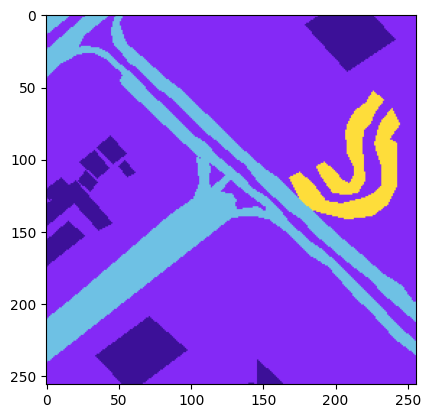

In [ ]:
plt.imshow(single_patch_mask)

In [ ]:
image_dataset = np.array(image_dataset)
mask_dataset = np.array(mask_dataset)

In [ ]:
len(image_dataset)

40

In [ ]:
len(mask_dataset)

40

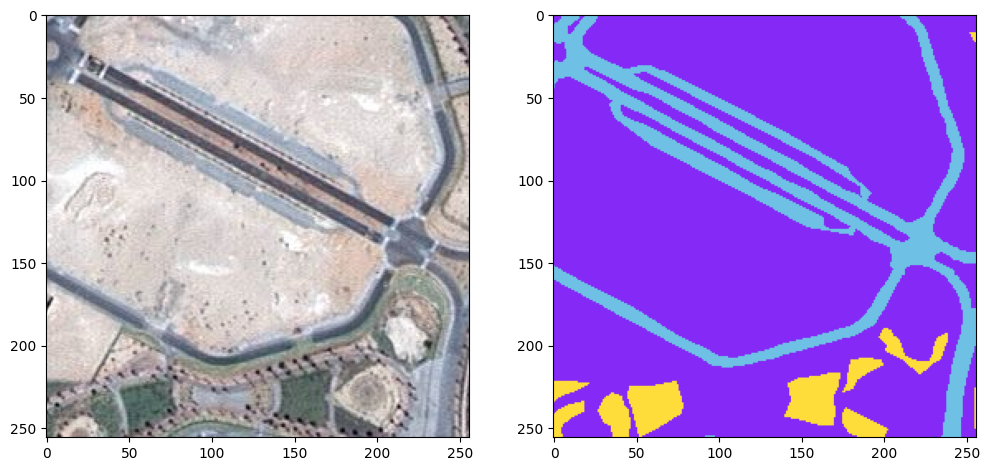

In [ ]:
import random
import numpy as np
image_number = random.randint(0,len(image_dataset))
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow(np.reshape(image_dataset[image_number], (patch_size,patch_size,3)))
plt.subplot(122)
plt.imshow(np.reshape(mask_dataset[image_number], (patch_size,patch_size,3)))
plt.show()


In [ ]:
# a = int('3c',16)
# print(a)

In [ ]:
Building = '#3C1098'.lstrip('#')
Building  = np.array(tuple(int(Building[i:i+2], 16) for i in (0,2,4) ))
Land = '#8429f6'.lstrip('#')
Land = np.array(tuple(int(Land[i:i+2],16)for i in (0,2,4)))
Road = "#6EC1E4".lstrip('#')
Road = np.array(tuple(int(Road[i:i+2],16)for i in (0,2,4)))
Vegetation ="#FED03A".lstrip('#')
Vegetation = np.array(tuple(int(Vegetation[i:i+2],16)for i in (0,2,4)))
Water ="#E2A929".lstrip('#')
Water = np.array(tuple(int(Water[i:i+2],16)for i in (0,2,4)))
Unlabeled ="#9B9B9B".lstrip('#')
Unlabeled = np.array(tuple(int(Unlabeled[i:i+2],16)for i in (0,2,4)))

In [ ]:
print(Building)
print(Land)
print(Road)
print(Vegetation)
print(Water)
print(Unlabeled)

[ 60  16 152]
[132  41 246]
[110 193 228]
[254 208  58]
[226 169  41]
[155 155 155]


In [ ]:
label = single_patch_mask

In [ ]:
label

array([[[110, 193, 228],
        [110, 193, 228],
        [110, 193, 228],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[110, 193, 228],
        [110, 193, 228],
        [110, 193, 228],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[110, 193, 228],
        [110, 193, 228],
        [110, 193, 228],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       ...,

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]],

       [[132,  41, 246],
        [132,  41, 246],
        [132,  41, 246],
        ...,
        [132,  41, 246],
        [132,  41, 246],
        [132,  41, 246]]

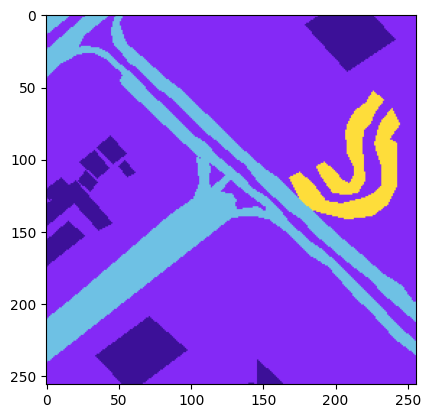

In [ ]:
plt.imshow(label)

In [ ]:
#replacing the rgb to integerr values to be used as labels
# find pixeels with the combinaltions of te abouve array then replace that with a specified integer wich ids the label
def rgb_to_2d_label(label):
  label_segment = np.zeros(label.shape,dtype = np.uint8)
  label_segment [np.all(label == Building, axis =-1)] = 0
  label_segment[np.all(label == Road,axis = -1)] = 1
  label_segment[np.all(label == Land,axis = -1)] = 2
  label_segment[np.all(label == Vegetation,axis = -1)] = 3
  label_segment[np.all(label == Water,axis = -1)] = 4
  label_segment[np.all(label == Unlabeled,axis = -1)] = 5
  label_segment = label_segment[:,:,0]#taking only 2 dimension and leaving the 3rd one
  return label_segment

In [ ]:
labels = []
for i in range(mask_dataset.shape[0]):
  label = rgb_to_2d_label(mask_dataset[i])
  labels.append(label)

labels = np.array(labels)
labels = np.expand_dims(labels, axis = 3)


In [ ]:
labels.shape

(40, 256, 256, 1)

In [ ]:
print("unique labels in label dataset are: ",np.unique(labels))

unique labels in label dataset are:  [0 1 2 4 5]


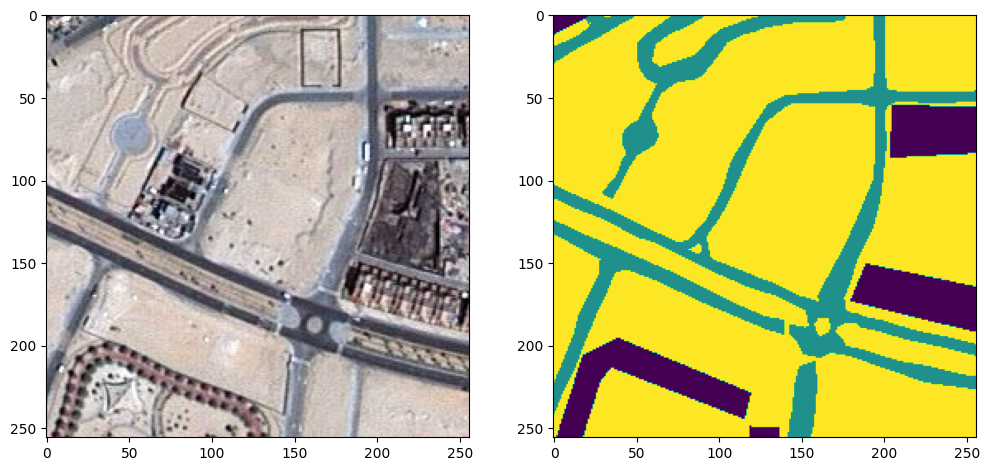

In [ ]:
import random
import numpy as np
image_number = random.randint(0,len(image_dataset))
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.imshow((image_dataset[image_number]))
plt.subplot(122)
plt.imshow((labels[image_number][:,:,0]))
plt.show()

In [ ]:
n_classes = len(np.unique(labels))+1
from keras.utils import to_categorical
labels_cat = to_categorical(labels, num_classes = n_classes)


In [ ]:
labels_cat.shape

(40, 256, 256, 6)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(image_dataset, labels_cat, test_size = 0.20, random_state = 42)

In [ ]:
weights = [0.1666,0.1666,0.1666,0.1666,0.1666,0.1666]
weights = np.array(weights)
dice_loss = sm.losses.DiceLoss(class_weights = weights)
focal_loss =sm.losses.CategoricalFocalLoss()
total_loss = dice_loss +(1* focal_loss)

In [ ]:
from keras.models import Model
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,concatenate,Conv2DTranspose,Activation
from keras import backend as k
from keras.metrics import IoU

In [ ]:
image_height = X_train[1]
image_width = X_train[2]
image_channels = X_train[3]

In [ ]:
def encoder_block(input_image,num_filters):
  x = Conv2D(num_filters,(3,3),strides = 2,padding  ="same",kernel_initializer = 'he_normal')(input_image)
  x = Activation('relu')(x)
  x = Conv2D(num_filters,(3,3),strides = 2,padding = 'same',kernel_initializer = 'he_normal')(x)
  x =Activation('relu')(x)
  x = MaxPooling2D(pool_size = (2,2),padding = 'same')(x)
  return x




In [ ]:
def decoder_block(skip_features,input_image,num_filters):
    y = Conv2DTranspose(num_filters,(2,2),padding = 'same',strides = 2)(input_image)
    skip_features = tf.image.resize(skip_features, size = (y.shape[1],  y.shape[2]))
    y = concatenate([y,skip_features],axis = 3)
    y = Conv2D(num_filters,(3,3),padding = 'same',strides = 2,kernel_initializer = 'he_normal')(y)
    y = Activation('relu')(y)
    y = Conv2D(num_filters,(3,3),padding = 'same',strides = 2,kernel_initializer = 'he_normal')(y)
    y = Activation('relu')(y)
    return y




In [ ]:
def U_net_architecture(input_shape ,num_classes = 6):
  inputs = Input(input_shape)
  print(inputs.shape)
  e1 = encoder_block(inputs,16)
  e2 = encoder_block(e1,32)
  e3 = encoder_block(e2,64)
  e4 = encoder_block(e3,128)

  b1 = Conv2D(256,3,padding = 'same',strides = (2,2),kernel_initializer = 'he_normal')(e4)
  b1 = Activation('relu')(b1)
  b2 = Conv2D(256,3,padding = 'same',strides = (2,2),kernel_initializer = 'he_normal')(b1)
  b2 = Activation('relu')(b2)

  d1 = decoder_block(e4,b2,128)
  d2 = decoder_block(e3,d1,64)
  d3 = decoder_block(e2,d2,32)
  d4 = decoder_block(e1,d3,16)

  outputs = Conv2D(n_classes,1,padding = 'same',activation ='sigmoid')(d4)
  model = Model(inputs = inputs,outputs = outputs ,name = 'U-Net')
  return model

In [ ]:
  # print(inputs.shape)

NameError: ignored

In [ ]:
# def Jacard_coeff(y_true,y_pred):
#   # y_pred_flatten = k.flatten(y_pred)

#   # y_true_flatten = k.flatten(y_true)


#   intersection = k.sum(y_true * y_pred)
#   union =k.sum(y_pred) +k.sum(y_true) - intersection
#   Jacard_loss  = (intersection+1)/(union+1)
#   return Jacard_loss


In [ ]:
metrics = ['accuracy']


In [ ]:
def  get_model():
  input_shape = (256,256,3)
  return U_net_architecture(input_shape , num_classes = 6)

model = get_model()
model.compile(optimizer = 'adam', loss = total_loss,metrics = metrics)
model.summary()


(None, 256, 256, 3)
Model: "U-Net"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_25 (InputLayer)       [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv2d_437 (Conv2D)         (None, 128, 128, 16)         448       ['input_25[0][0]']            
                                                                                                  
 activation_414 (Activation  (None, 128, 128, 16)         0         ['conv2d_437[0][0]']          
 )                                                                                                
                                                                                                  
 conv2d_438 (Conv2D)         (None, 64, 64, 16)           2320      ['acti

In [ ]:
type(X_test)

numpy.ndarray

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
history = model.fit(X_train, y_train,batch_size = 16,verbose = 1,epochs = 100,validation_data=(X_test, y_test),shuffle = False)

Epoch 1/100
2/2 [==============================] - 6s 899ms/step - loss: 0.8863 - accuracy: 0.1601 - val_loss: 0.8978 - val_accuracy: 0.1403
Epoch 2/100
2/2 [==============================] - 1s 476ms/step - loss: 0.8836 - accuracy: 0.1528 - val_loss: 0.8965 - val_accuracy: 0.1667
Epoch 3/100
2/2 [==============================] - 1s 398ms/step - loss: 0.8813 - accuracy: 0.1615 - val_loss: 0.8951 - val_accuracy: 0.1667
Epoch 4/100
2/2 [==============================] - 1s 467ms/step - loss: 0.8791 - accuracy: 0.1615 - val_loss: 0.8936 - val_accuracy: 0.1667
Epoch 5/100
2/2 [==============================] - 1s 487ms/step - loss: 0.8774 - accuracy: 0.1615 - val_loss: 0.8921 - val_accuracy: 0.1667
Epoch 6/100
2/2 [==============================] - 1s 607ms/step - loss: 0.8749 - accuracy: 0.1615 - val_loss: 0.8897 - val_accuracy: 0.1667
Epoch 7/100
2/2 [==============================] - 1s 633ms/step - loss: 0.8710 - accuracy: 0.1615 - val_loss: 0.8857 - val_accuracy: 0.1667
Epoch 8/100
2

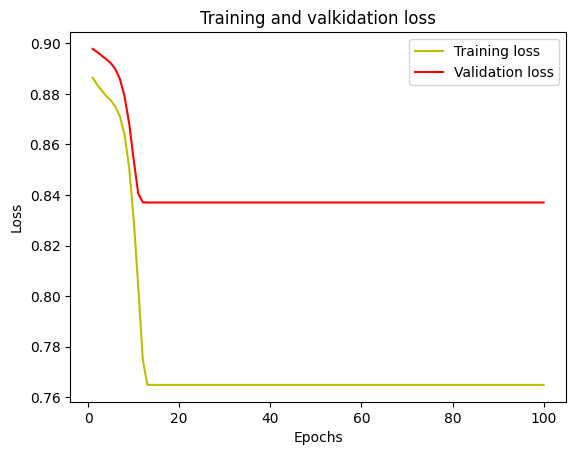

In [ ]:
history = history
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.plot(epochs,val_loss,'r',label = 'Validation loss')
plt.title('Training and valkidation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
%cd '/content/drive/My Drive/SatelliteImagery/'

/content/drive/My Drive/SatelliteImagery


In [ ]:
tf.saved_model.save(model, 'history')

In [ ]:
%cd '/content/drive/My Drive/SatelliteImagery/'

/content/drive/My Drive/SatelliteImagery


In [ ]:
from keras.models import load_model
model = tf.saved_model.load('history')

In [ ]:
y_pred=model.predict(X_test)
y_pred_argmax=np.argmax(y_pred, axis=3)
y_test_argmax=np.argmax(y_test, axis=3)


1/1 [==============================] - 0s 57ms/step


In [ ]:
import random
test_img_number = random.randint(0, len(X_test))
test_img = X_test[test_img_number]
ground_truth=y_test_argmax[test_img_number]
#test_img_norm=test_img[:,:,0][:,:,None]
test_img_input=np.expand_dims(test_img, 0)
prediction = (model.predict(test_img_input))
predicted_img=np.argmax(prediction, axis=3)[0,:,:]


1/1 [==============================] - 0s 179ms/step
